In [0]:
from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
cd /content/gdrive/My Drive/중소기업


/content/gdrive/My Drive/중소기업


In [88]:
!ls

실태조사_일반항목19.csv  clustering.csv		 K-means_Spectral.zip
실태조사_서비스업19.csv  data_merge.ipynb	 mergedata.csv
실태조사_제조업19.csv	 data_merge.zip		 modedata.csv
기술통계19.csv		 dumdata.csv		 origin.csv
기술통계19.xlsx		 K-means_Spectral.ipynb  Untitled0.ipynb


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift,estimate_bandwidth
from itertools import cycle

(1) 결측치를 최빈값으로 대체한 데이터 이용

In [0]:
X = pd.read_csv('modedata.csv')

In [0]:
X = pd.read_csv('origin.csv')

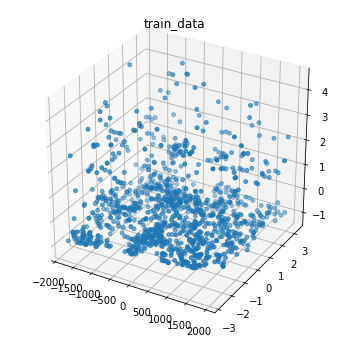

In [90]:
my_train_show = X[:]
pca = PCA(n_components=3).fit(my_train_show) #2개로 진행해봄
pca_train = pca.transform(my_train_show)
plt.rcParams["figure.figsize"] = (6,6)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_train[:, 0], pca_train[:, 1], pca_train[:,2], marker='o', s=15)
ax.set_title('train_data')
plt.show()

입력 데이터의 대역폭 예측


대역폭 : mean-shift 알고리즘에서 사용하는 내부 커널 밀도 추정 프로세스에 대한 매개변수

In [0]:
bandwidth_X = estimate_bandwidth(X,quantile=0.1,n_samples=len(X))

Mean-Shift 알고리즘 이용하여 군집 모델 생성

In [0]:
meanshift_model = MeanShift(bandwidth=bandwidth_X,bin_seeding=True)

In [0]:
meanshift_model.fit(X)

MeanShift(bandwidth=2.6701588989021516, bin_seeding=True, cluster_all=True,
          max_iter=300, min_bin_freq=1, n_jobs=None, seeds=None)

군집 개수 측정

In [0]:
labels = meanshift_model.labels_
num_clusters = len(np.unique(labels))
print(num_clusters)

2


(2) 더미변수 데이터 이용

In [0]:
X = pd.read_csv('dumdata.csv')

In [0]:
bandwidth_X = estimate_bandwidth(X,quantile=0.1,n_samples=len(X))

In [0]:
meanshift_model = MeanShift(bandwidth=bandwidth_X,bin_seeding=True)

In [0]:
meanshift_model.fit(X)

ValueError: ignored

결론 : 더미변수로 실행 시, 군집으로 나눠지지 않음



## 실루엣 지수 구하기



(1) DBSCAN_결측치대체

In [0]:
X = pd.read_csv('modedata.csv')

In [0]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score

In [0]:
dbscan = DBSCAN(eps=2.4,min_samples=150)
dbscan.fit(X)
print(silhouette_score(X,dbscan.labels_))

0.1831050136808965


(2) Mean-Shift_결측치대체

In [0]:
X = pd.read_csv('modedata.csv')

In [0]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score

In [0]:
meanshift = meanshift_model.fit(X)
print(silhouette_score(X,meanshift.label_))

0.2512634547596134


(3) DBSCAN_결측치대체_PCA

In [0]:
X = pd.read_csv('modedata.csv')

In [0]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

In [101]:
model = DBSCAN(eps=2.4,min_samples=150)
model.fit(my_train_pca_4)
dbscan_pca_predict = model.fit_predict(my_train_pca_4)
print(dbscan_pca_predict)
# print(silhouette_score(my_train_pca_4,dbscan_pca_predict))

[-1 -1 -1 ... -1 -1 -1]


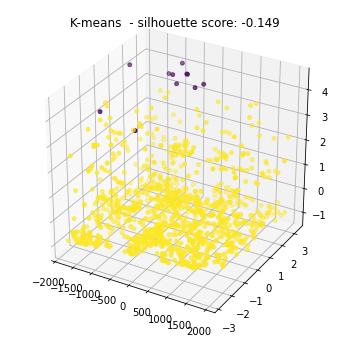

In [96]:
my_train_pca = X[:]
pca = PCA(n_components=2).fit(my_train_pca)
my_train_pca_4 = pca.transform(my_train_pca)

plt.rcParams["figure.figsize"] = (6,6)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_train[:, 0], pca_train[:, 1], pca_train[:,2],  c=dbscan_pca_predict, marker='o', s=15)

ax.set_title('K-means  - silhouette score: {:.3f}'.format(silhouette_score(my_train_show, dbscan_pca_predict))) 
plt.show()

(4) Mean-Shift_결측치대체_PCA

In [0]:
X = pd.read_csv('modedata.csv')

In [0]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score

In [86]:
my_train_pca = X[:]
pca = PCA(n_components=4).fit(my_train_pca)
my_train_pca_4 = pca.transform(my_train_pca)

bandwidth_X = estimate_bandwidth(X,quantile=0.1,n_samples=len(X))
model = MeanShift(bandwidth=bandwidth_X,bin_seeding=True)

model.fit(my_train_pca_4)

meanshift_pca_predict = model.fit_predict(my_train_pca_4)

meanshift_pca_predict
# print(silhouette_score(my_train_pca_4,meanshift_pca_predict))

array([0, 0, 0, ..., 0, 0, 0])

In [84]:
meanshift_pca_predict

array([0, 0, 0, ..., 0, 0, 0])

In [0]:
model

MeanShift(bandwidth=2.6701588989021516, bin_seeding=True, cluster_all=True,
          max_iter=300, min_bin_freq=1, n_jobs=None, seeds=None)

## 주성분 분석 PCA

In [0]:
X = pd.read_csv('modedata.csv')

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

(1)표준화하고 pca...?

In [0]:
sc = StandardScaler()
x_train_std = sc.fit_transform(X)

cov = np.cov(x_train_std.T)
eigen_vals,eigen_vector = np.linalg.eig(cov)

print('고유값\n%s'%eigen_vals)

total = sum(eigen_vals)
exp_val = [(i/total) for i in sorted(eigen_vals,reverse=True)]
cum_var_exp = np.cumsum(exp_val)




고유값
[4.45002027 1.38881148 1.12748604 1.09477568 0.95784025 0.84773217
 0.70303783 0.47461004 0.12139254 0.33062689 0.24196203 0.27161395]


In [0]:
cum_var_exp

array([0.37052905, 0.48616785, 0.5800475 , 0.67120353, 0.7509577 ,
       0.82154376, 0.8800819 , 0.91960011, 0.94712962, 0.96974544,
       0.9898923 , 1.        ])

적절한 주성분의 개수는 7개로 추정...!

(2) 표준화하지 않고 pca 실행

In [0]:
from sklearn.decomposition import PCA

X = pd.read_csv('modedata.csv')

my_train_pca = X[:]
pca = PCA(n_components = 10)
pca.fit(my_train_pca)
print('explained variance ratio : \n', pca.explained_variance_ratio_)
percentile = []
for i in pca.explained_variance_ratio_:
    if len(percentile) ==0:
        percentile.append(i)
    else:
        percentile.append(percentile[-1]+i)
print(' ')
print('PCA의 데이터반영 누적비율')
print(percentile)

explained variance ratio : 
 [0.35666767 0.1456118  0.12231266 0.09389954 0.06826151 0.06065795
 0.03922928 0.03529256 0.02637156 0.02294476]
 
PCA의 데이터반영 누적비율
[0.35666766906155106, 0.5022794727943837, 0.6245921350846011, 0.7184916754962278, 0.7867531886655742, 0.8474111390996311, 0.8866404154667693, 0.921932977984651, 0.9483045365288159, 0.9712492952789288]


적절한 주성분의 개수는 4개로 추정

### 주성분 분석 _ dbscan _ 더미(X)

In [0]:
from sklearn.cluster import DBSCAN

my_train_pca = X[:]
pca = PCA(n_components=4).fit(my_train_pca)
my_train_pca_4 = pca.transform(my_train_pca)

model = DBSCAN(eps=2.4,min_samples=150)
model.fit(my_train_pca_4)
dbscan_pca_predict = model.fit_predict(my_train_pca_4)

### 주성분 분석 _ MeanShift _ 더미(X)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift,estimate_bandwidth
from itertools import cycle

my_train_pca = X[:]
pca = PCA(n_components=4).fit(my_train_pca)
my_train_pca_4 = pca.transform(my_train_pca)

bandwidth_X = estimate_bandwidth(X,quantile=0.1,n_samples=len(X))
model = MeanShift(bandwidth=bandwidth_X,bin_seeding=True)
model.fit(my_train_pca_4)

meanshift_pca_predict = model.fit_predict(my_train_pca_4)